In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import ast

In [82]:
# grabbing task 2 output
t1_df = pd.read_csv("../data/t1_annotate/output/task1-annotations.csv")
t2_df = pd.read_csv("../data/t2_guess/output/task2-guess-final.csv")

In [83]:
# initializing numpy arrays to fill for heat map
cat_map = np.zeros((12,17))
pizza_map = np.zeros((15,22)) 
bike_map = np.zeros((12,17))
horse_map = np.zeros((15,22))
giraffe_map = np.zeros((15,22))

In [84]:
# The idea of this aggregation is to create a heat map of "winning" deblur clicks--what clicks lead to correct guesses
cols = ["000000022892", "000000402433", "000000426166", "000000576955", "000000577862"]
lst_cols = [cat_map, pizza_map, bike_map, horse_map, giraffe_map]
answer_cols = ["cat", "pizza", "bike", "horse", "giraffe"]
below_threshold = ["A182N7RLXGSCZG", "A1BZWNYN6GHJ76", "A1GRLZL4F72RBJ"]
for index, row in t2_df.iterrows():
    if row["WorkerId"] not in below_threshold:
        input_Id = row["inputId"]
        t1_df_row = t1_df.loc[t1_df["AssignmentId"] == input_Id]
        for i in range(len(cols)):
            current_map = lst_cols[i]
            current_answer = answer_cols[i]
            guesses = ast.literal_eval(row[str(cols[i])])
            clicks = json.loads(t1_df_row[str(cols[i])].tolist()[0])
            for j, guess in enumerate(guesses):
                if guess == current_answer:
                    last_click = clicks[j]
                    current_map[last_click[0], last_click[1]] = current_map[last_click[0], last_click[1]] + 1
    else:
        print()

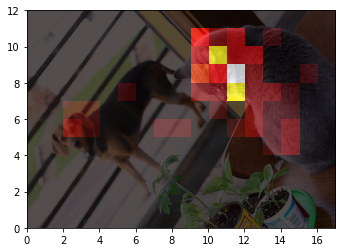

In [85]:
cat_img = plt.imread("../data/t1_annotate/input/000000022892.jpg")
plt.imshow(cat_img, extent=[0,17,0,12])
plt.imshow(cat_map, cmap='hot', interpolation='nearest', alpha=.7, extent=[0,17,0,12])
plt.savefig("../aggregation/task2/cat-map.png")
plt.show()

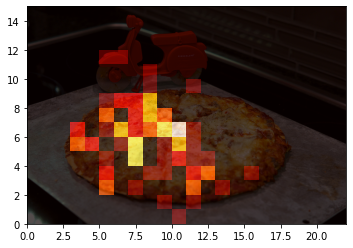

In [86]:
pizza_img = plt.imread("../data/t1_annotate/input/000000402433.jpg")
plt.imshow(pizza_img, extent=[0,22,0,15])
plt.imshow(pizza_map, cmap='hot', interpolation='nearest', alpha=.7, extent=[0,22,0,15])
plt.savefig("../aggregation/task2/pizza-map.png")
plt.show()

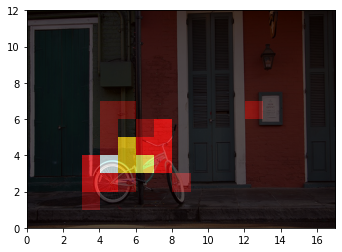

In [87]:
bike_img = plt.imread("../data/t1_annotate/input/000000426166.jpg")
plt.imshow(bike_img, extent=[0,17,0,12])
plt.imshow(bike_map, cmap='hot', interpolation='nearest', alpha=.7, extent=[0,17,0,12])
plt.savefig("../aggregation/task2/bike-map.png")
plt.show()

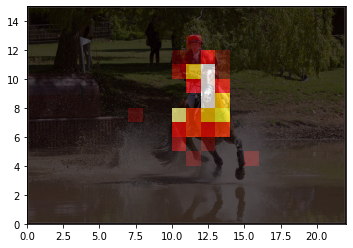

In [88]:
horse_img = plt.imread("../data/t1_annotate/input/000000576955.jpg")
plt.imshow(horse_img, extent=[0,22,0,15])
plt.imshow(horse_map, cmap='hot', interpolation='nearest', alpha=.7, extent=[0,22,0,15])
plt.savefig("../aggregation/task2/horse-map.png")
plt.show()

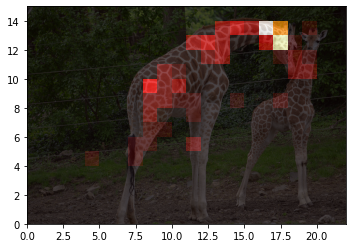

In [89]:
giraffe_img = plt.imread("../data/t1_annotate/input/000000577862.jpg")
plt.imshow(giraffe_img, extent=[0,22,0,15])
plt.imshow(giraffe_map, cmap='hot', interpolation='nearest', alpha=.7, extent=[0,22,0,15])
plt.savefig("../aggregation/task2/giraffe-map.png")
plt.show()